<a href="https://colab.research.google.com/github/shahg1122/Final_PResent/blob/master/SolarStationsite1_multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import plotly.express as px
import numpy as np
from matplotlib import pyplot as plt
import math
from pylab import *
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
Dataset_SF_site1 = pd.read_excel('/content/sample_data/Solar station site 1 (Nominal capacity-50MW).xlsx').drop(index=0)

In [5]:
Dataset_SF_site1.corr()

,Total solar irradiance (W/m2),Direct normal irradiance (W/m2),Global horizontal irradiance (W/m2),Air temperature (°C),Atmosphere (hpa),Power (MW)
Total solar irradiance (W/m2),1.000000,0.623455,0.658610,0.253883,-0.074631,0.946484
Direct normal irradiance (W/m2),0.623455,1.000000,0.212730,0.115503,0.015354,0.578948
Global horizontal irradiance (W/m2),0.658610,0.212730,1.000000,0.252712,-0.125878,0.648818
Air temperature (°C),0.253883,0.115503,0.252712,1.000000,-0.850142,0.228379
Atmosphere (hpa),-0.074631,0.015354,-0.125878,-0.850142,1.000000,-0.057247
Power (MW),0.946484,0.578948,0.648818,0.228379,-0.057247,1.000000


In [6]:
(Dataset_SF_site1['Power (MW)'] < 0).sum()

0

In [7]:
Dataset_SF_site1.sample(15)

,Time(year-month-day h:m:s),Total solar irradiance (W/m2),Direct normal irradiance (W/m2),Global horizontal irradiance (W/m2),Air temperature (°C),Atmosphere (hpa),Power (MW)
57856,2020-08-25 16:00:00,829,41,108,37.9,900.3,32.756664
14216,2019-05-29 02:00:00,0,0,0,24.0,911.3,0.000000
36224,2020-01-13 08:00:00,0,1,0,-10.4,916.0,0.000000
21004,2019-08-07 19:00:00,227,2,92,29.4,906.2,9.058200
58448,2020-08-31 20:00:00,21,0,14,28.9,910.2,0.062800
42353,2020-03-17 04:15:00,0,0,0,4.9,920.3,0.000000
1480,2019-01-16 10:00:00,73,5,35,-11.2,921.0,2.804333
2844,2019-01-30 15:00:00,996,78,64,-7.7,933.0,44.556133
60856,2020-09-25 22:00:00,0,0,0,15.6,907.5,0.000000
6883,2019-03-13 16:45:00,735,575,90,14.2,921.2,31.540600


In [8]:
Dataset_SF_site1.isna().sum()

Time(year-month-day h:m:s)             0
Total solar irradiance (W/m2)          0
Direct normal irradiance (W/m2)        0
Global horizontal irradiance (W/m2)    0
Air temperature  (°C)                  0
Atmosphere (hpa)                       0
Power (MW)                             0
dtype: int64

In [9]:
Dataset_SF_site1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70175 entries, 1 to 70175
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Time(year-month-day h:m:s)           70175 non-null  object 
 1   Total solar irradiance (W/m2)        70175 non-null  int64  
 2   Direct normal irradiance (W/m2)      70175 non-null  int64  
 3   Global horizontal irradiance (W/m2)  70175 non-null  int64  
 4   Air temperature  (°C)                70175 non-null  float64
 5   Atmosphere (hpa)                     70175 non-null  float64
 6   Power (MW)                           70175 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 4.3+ MB


In [10]:
Dataset_SF_site1.isnull().sum()

Time(year-month-day h:m:s)             0
Total solar irradiance (W/m2)          0
Direct normal irradiance (W/m2)        0
Global horizontal irradiance (W/m2)    0
Air temperature  (°C)                  0
Atmosphere (hpa)                       0
Power (MW)                             0
dtype: int64

In [11]:
Dataset_SF_site1.dtypes

Time(year-month-day h:m:s)              object
Total solar irradiance (W/m2)            int64
Direct normal irradiance (W/m2)          int64
Global horizontal irradiance (W/m2)      int64
Air temperature  (°C)                  float64
Atmosphere (hpa)                       float64
Power (MW)                             float64
dtype: object

In [12]:
Dataset_SF_site1["Time(year-month-day h:m:s)"] = pd.to_datetime(Dataset_SF_site1["Time(year-month-day h:m:s)"])

In [13]:
Dataset_SF_site1.dtypes

Time(year-month-day h:m:s)             datetime64[ns]
Total solar irradiance (W/m2)                   int64
Direct normal irradiance (W/m2)                 int64
Global horizontal irradiance (W/m2)             int64
Air temperature  (°C)                         float64
Atmosphere (hpa)                              float64
Power (MW)                                    float64
dtype: object

In [14]:
Dataset_SF_site1['Total solar irradiance (W/m2)'] = Dataset_SF_site1['Total solar irradiance (W/m2)'].astype('float64')
Dataset_SF_site1['Direct normal irradiance (W/m2)'] = Dataset_SF_site1['Direct normal irradiance (W/m2)'].astype('float64')
Dataset_SF_site1['Global horizontal irradiance (W/m2)'] = Dataset_SF_site1['Global horizontal irradiance (W/m2)'].astype('float64')
Dataset_SF_site1.dtypes

Time(year-month-day h:m:s)             datetime64[ns]
Total solar irradiance (W/m2)                 float64
Direct normal irradiance (W/m2)               float64
Global horizontal irradiance (W/m2)           float64
Air temperature  (°C)                         float64
Atmosphere (hpa)                              float64
Power (MW)                                    float64
dtype: object

In [15]:
Dataset_SF_site1.describe()

,Total solar irradiance (W/m2),Direct normal irradiance (W/m2),Global horizontal irradiance (W/m2),Air temperature (°C),Atmosphere (hpa),Power (MW)
count,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000
mean,266.211129,93.258326,67.693595,13.148522,913.366904,9.669499
std,367.893799,200.778335,111.198478,14.336642,8.740467,13.705151
min,0.000000,0.000000,0.000000,-18.200000,894.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,905.700000,0.000000
50%,5.000000,1.000000,4.000000,15.100000,913.300000,0.000000
75%,540.000000,36.000000,97.000000,25.300000,920.200000,18.794767
max,1359.000000,980.000000,989.000000,41.200000,936.300000,48.321730


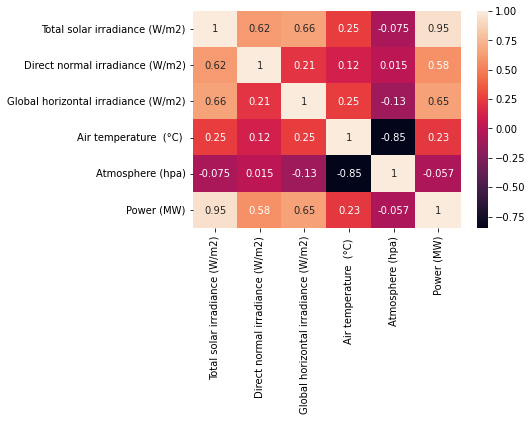

In [16]:
sns.heatmap(Dataset_SF_site1.corr(), annot=True)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


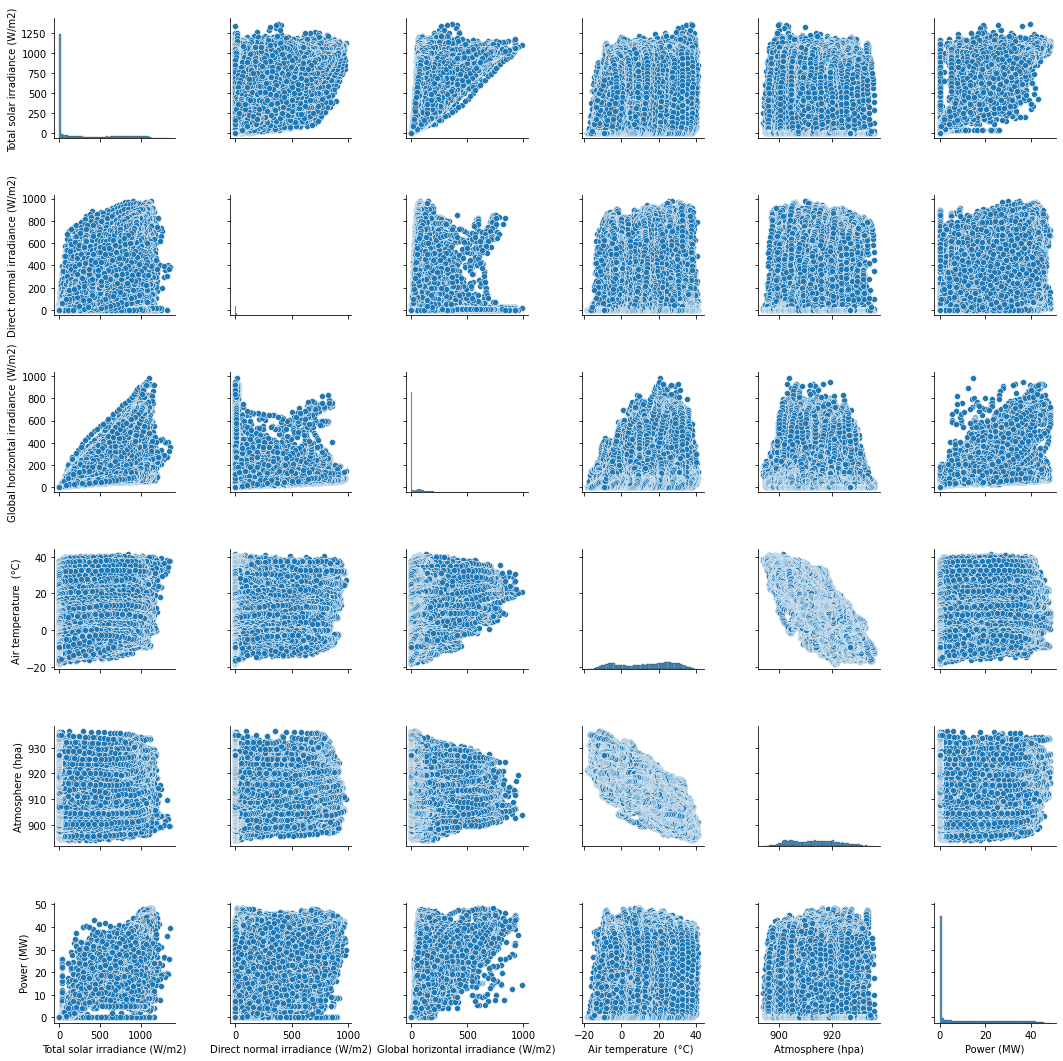

In [17]:
sns.pairplot(Dataset_SF_site1, hue=None, size=2.5)

In [19]:
Dataset_SF_site1.describe()

,Total solar irradiance (W/m2),Direct normal irradiance (W/m2),Global horizontal irradiance (W/m2),Air temperature (°C),Atmosphere (hpa),Power (MW),Year,Month,Day,Hour,Minutes,Seconds
count,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.0
mean,266.211129,93.258326,67.693595,13.148522,913.366904,9.669499,2019.500691,6.519914,15.738924,11.500164,22.500321,0.0
std,367.893799,200.778335,111.198478,14.336642,8.740467,13.705151,0.500003,3.449537,8.803870,6.922149,16.770534,0.0
min,0.000000,0.000000,0.000000,-18.200000,894.000000,0.000000,2019.000000,1.000000,1.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,905.700000,0.000000,2019.000000,4.000000,8.000000,6.000000,15.000000,0.0
50%,5.000000,1.000000,4.000000,15.100000,913.300000,0.000000,2020.000000,7.000000,16.000000,12.000000,30.000000,0.0
75%,540.000000,36.000000,97.000000,25.300000,920.200000,18.794767,2020.000000,10.000000,23.000000,17.500000,37.500000,0.0
max,1359.000000,980.000000,989.000000,41.200000,936.300000,48.321730,2020.000000,12.000000,31.000000,23.000000,45.000000,0.0


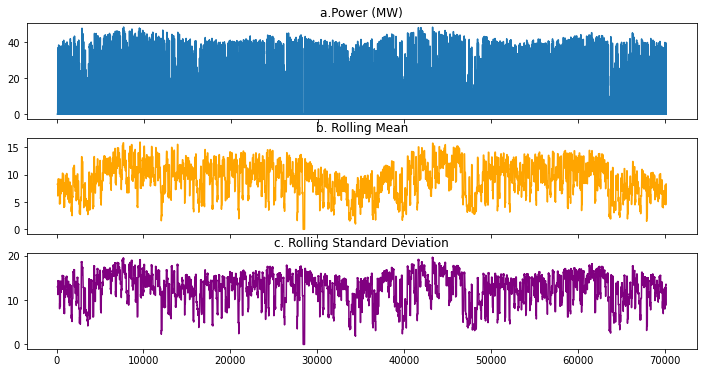

In [97]:
fig, axes = plt.subplots(nrows=3, ncols=1)
Dataset_SF_site1['Power (MW)'].plot(ax=axes[0], figsize=(12,6), rot=90, title='a.Power (MW)', sharex=True)
Dataset_SF_site1['Power (MW)'].rolling(90).mean().plot(ax=axes[1], figsize=(12,6), rot=90, title='b. Rolling Mean', color='orange')
Dataset_SF_site1['Power (MW)'].rolling(90).std().plot(ax=axes[2], figsize=(12,6), rot=0, title='c. Rolling Standard Deviation', color='purple')
plt.show()

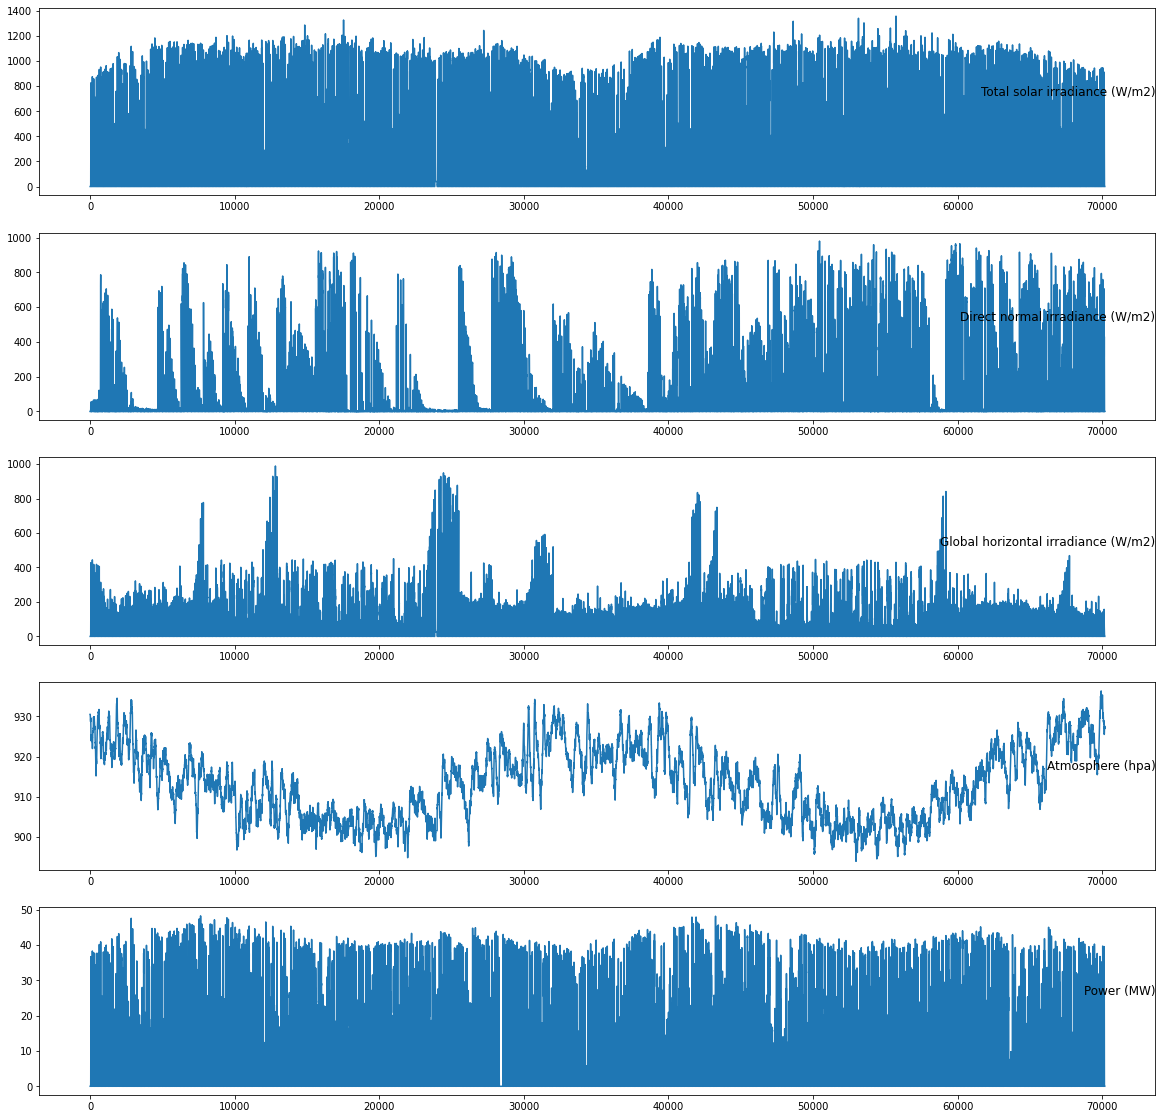

In [99]:
values = Dataset_SF_site1.values
groups = [1, 2, 3, 5, 6]
i = 1
# plot each column
pyplot.figure(figsize=(20, 20))
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(Dataset_SF_site1.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [18]:
# Spliting the date time in year, month, days, hours and minutes
Dataset_SF_site1['Year'] = pd.DatetimeIndex(Dataset_SF_site1['Time(year-month-day h:m:s)']).year
Dataset_SF_site1['Month'] = pd.DatetimeIndex(Dataset_SF_site1['Time(year-month-day h:m:s)']).month
Dataset_SF_site1['Day'] = pd.DatetimeIndex(Dataset_SF_site1['Time(year-month-day h:m:s)']).day
Dataset_SF_site1['Hour'] = pd.DatetimeIndex(Dataset_SF_site1['Time(year-month-day h:m:s)']).hour
Dataset_SF_site1['Minutes'] = pd.DatetimeIndex(Dataset_SF_site1['Time(year-month-day h:m:s)']).minute
Dataset_SF_site1['Seconds'] = pd.DatetimeIndex(Dataset_SF_site1['Time(year-month-day h:m:s)']).second

Dataset_SF_site1.head(10)

,Time(year-month-day h:m:s),Total solar irradiance (W/m2),Direct normal irradiance (W/m2),Global horizontal irradiance (W/m2),Air temperature (°C),Atmosphere (hpa),Power (MW),Year,Month,Day,Hour,Minutes,Seconds
1,2019-01-01 00:15:00,0.0,0.0,0.0,-11.8,930.5,0.0,2019,1,1,0,15,0
2,2019-01-01 00:30:00,0.0,0.0,0.0,-11.4,930.5,0.0,2019,1,1,0,30,0
3,2019-01-01 00:45:00,0.0,0.0,0.0,-11.5,930.5,0.0,2019,1,1,0,45,0
4,2019-01-01 01:00:00,0.0,0.0,0.0,-11.5,930.4,0.0,2019,1,1,1,0,0
5,2019-01-01 01:15:00,0.0,0.0,0.0,-11.8,930.1,0.0,2019,1,1,1,15,0
6,2019-01-01 01:30:00,0.0,0.0,0.0,-11.4,930.0,0.0,2019,1,1,1,30,0
7,2019-01-01 01:45:00,0.0,0.0,0.0,-10.7,930.0,0.0,2019,1,1,1,45,0
8,2019-01-01 02:00:00,0.0,1.0,0.0,-10.9,929.8,0.0,2019,1,1,2,0,0
9,2019-01-01 02:15:00,0.0,0.0,0.0,-10.9,929.8,0.0,2019,1,1,2,15,0
10,2019-01-01 02:30:00,0.0,1.0,0.0,-11.1,929.6,0.0,2019,1,1,2,30,0


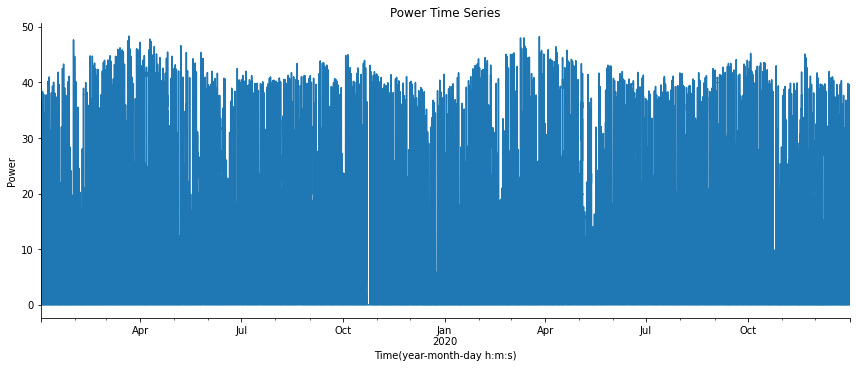

In [107]:
df1=Dataset_SF_site1.loc[:,['Time(year-month-day h:m:s)','Power (MW)']]
df1.set_index('Time(year-month-day h:m:s)',inplace=True)
df1.plot(figsize=(12,5))
plt.ylabel('Power')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Power Time Series')
sns.despine(top=True)
plt.show()

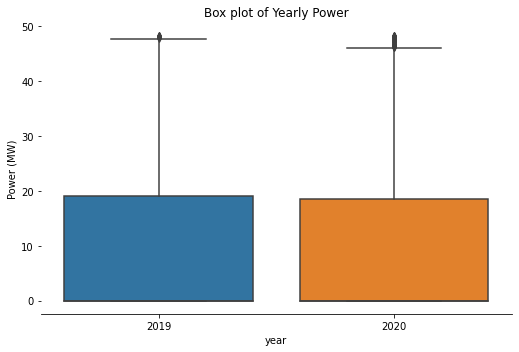

In [108]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x="Year", y="Power (MW)", data=Dataset_SF_site1)
plt.xlabel('year')
plt.title('Box plot of Yearly Power')
sns.despine(left=True)
plt.tight_layout()
plt.show()

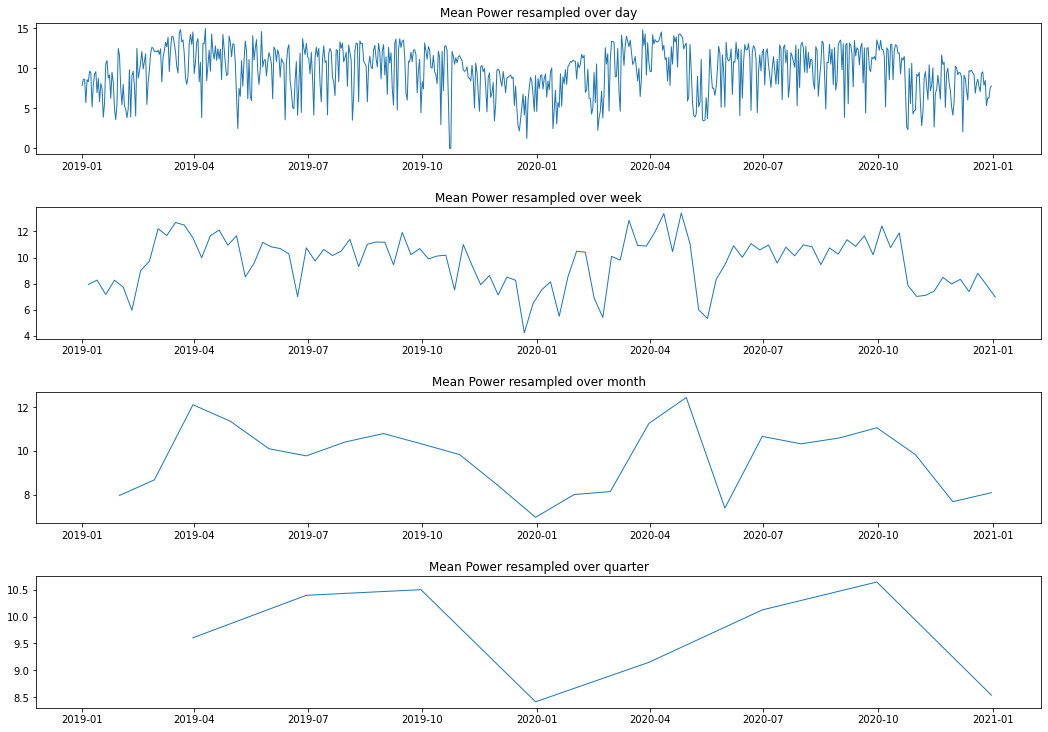

In [111]:
fig = plt.figure(figsize=(18,16))
fig.subplots_adjust(hspace=.4)
ax1 = fig.add_subplot(5,1,1)
ax1.plot(df1['Power (MW)'].resample('D').mean(),linewidth=1)
ax1.set_title('Mean Power resampled over day')
ax1.tick_params(axis='both', which='major')

ax2 = fig.add_subplot(5,1,2, sharex=ax1)
ax2.plot(df1['Power (MW)'].resample('W').mean(),linewidth=1)
ax2.set_title('Mean Power resampled over week')
ax2.tick_params(axis='both', which='major')

ax3 = fig.add_subplot(5,1,3, sharex=ax1)
ax3.plot(df1['Power (MW)'].resample('M').mean(),linewidth=1)
ax3.set_title('Mean Power resampled over month')
ax3.tick_params(axis='both', which='major')

ax4  = fig.add_subplot(5,1,4, sharex=ax1)
ax4.plot(df1['Power (MW)'].resample('Q').mean(),linewidth=1)
ax4.set_title('Mean Power resampled over quarter')
ax4.tick_params(axis='both', which='major')

plt.show()

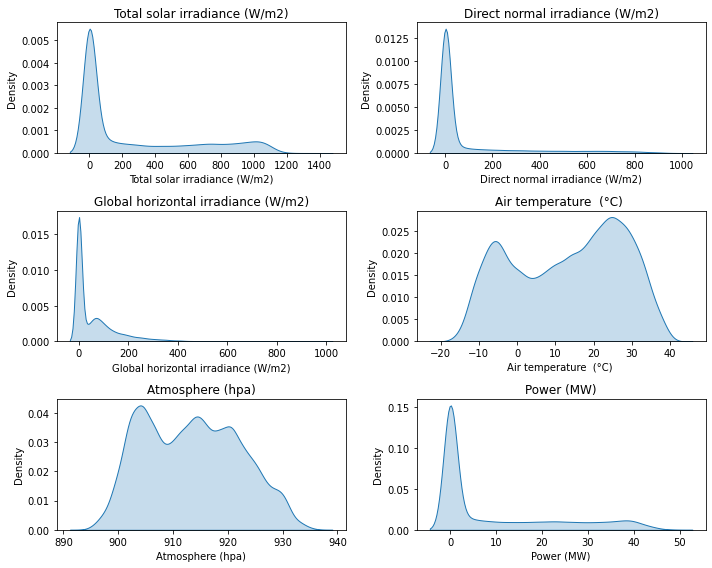

In [20]:
#plotting the data distribution
plt.figure(figsize=(10, 8))
for i in range(6):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(Dataset_SF_site1.iloc[:,i+1], shade=True)
    plt.title(Dataset_SF_site1.columns[i+1])
plt.tight_layout()
plt.show()

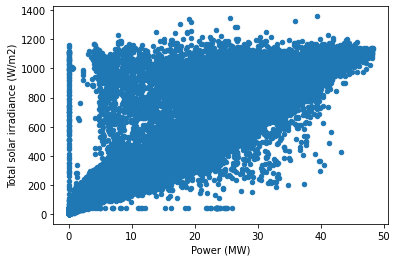

In [21]:
Dataset_SF_site1.plot(kind='scatter', x = 'Power (MW)', y = 'Total solar irradiance (W/m2)')

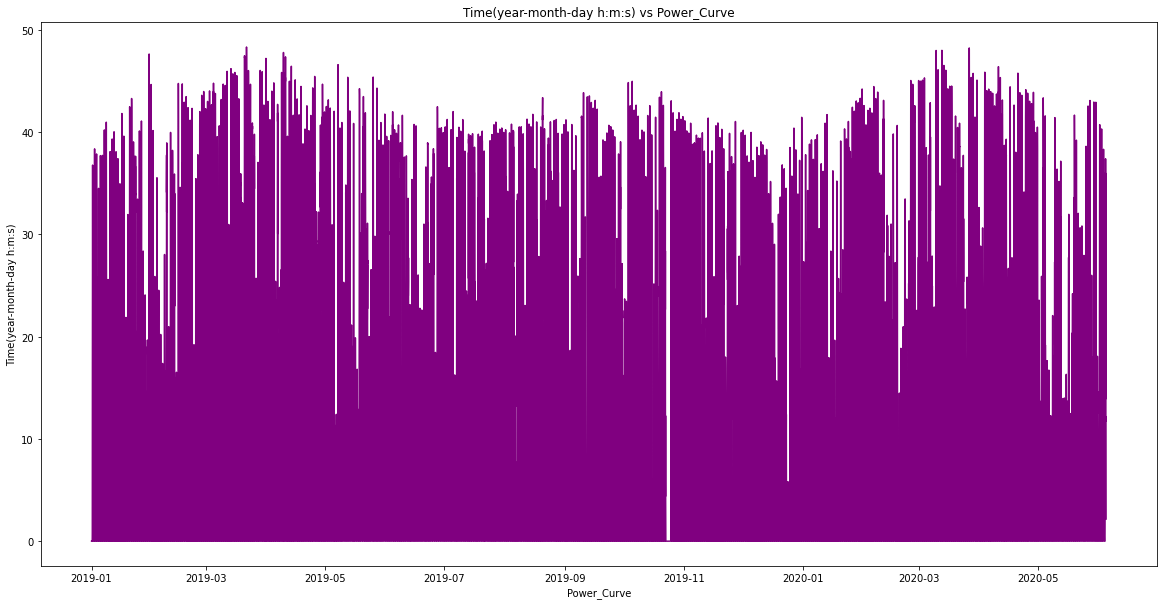

In [23]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20,10))
# Add x-axis and y-axis
ax.plot(Dataset_SF_site1['Time(year-month-day h:m:s)'][0:50000],
        Dataset_SF_site1['Power (MW)'][0:50000],
        color='purple')
# Set title and labels for axes
ax.set(xlabel="Power_Curve",
       ylabel="Time(year-month-day h:m:s)",
       title="Time(year-month-day h:m:s) vs Power_Curve")
plt.show()

In [29]:
from pandas import DataFrame
from pandas import Series
from scipy import stats
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd

<ipython-input-29-5532122f9ae6>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [65]:
dataset = Dataset_SF_site1.copy()
# dataset.drop(['Year', 'Month', 'Day', 'Hour', 'Minutes', 'Seconds'], axis=1)
# dataset = dataset.set_index('Time(year-month-day h:m:s)')
# dataset.describe()
dataset.drop(['Year', 'Month', 'Day', 'Hour', 'Minutes', 'Seconds'], axis=1, inplace=True)
dataset = dataset.set_index('Time(year-month-day h:m:s)')
dataset.columns

Index(['Total solar irradiance (W/m2)', 'Direct normal irradiance (W/m2)',
       'Global horizontal irradiance (W/m2)', 'Air temperature  (°C) ',
       'Atmosphere (hpa)', 'Power (MW)'],
      dtype='object')

In [67]:
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset.iloc[0:train_size], dataset.iloc[train_size:len(dataset)]
print(train.shape)
print(test.shape)
dataset.head()

(63157, 6)
(7018, 6)


,Total solar irradiance (W/m2),Direct normal irradiance (W/m2),Global horizontal irradiance (W/m2),Air temperature (°C),Atmosphere (hpa),Power (MW)
Time(year-month-day h:m:s),,,,,,
2019-01-01 00:15:00,0.0,0.0,0.0,-11.8,930.5,0.0
2019-01-01 00:30:00,0.0,0.0,0.0,-11.4,930.5,0.0
2019-01-01 00:45:00,0.0,0.0,0.0,-11.5,930.5,0.0
2019-01-01 01:00:00,0.0,0.0,0.0,-11.5,930.4,0.0
2019-01-01 01:15:00,0.0,0.0,0.0,-11.8,930.1,0.0


In [68]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_for_training_scaled = scaler.fit_transform(train)
df_for_testing_scaled = scaler.transform(test)
print(df_for_training_scaled[0])

[0.         0.         0.         0.10774411 0.90123457 0.        ]


In [69]:
stat, p = stats.normaltest(dataset['Power (MW)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=10162.505, p=0.000
Data does not look Gaussian (reject H0)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Kurtosis of normal distribution: -0.1735412781449046
Skewness of normal distribution: 1.1396416369556437


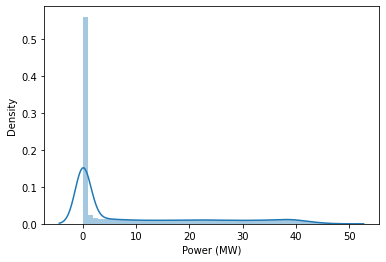

In [70]:
sns.distplot(dataset['Power (MW)'])
print('Kurtosis of normal distribution: {}'.format(stats.kurtosis(dataset['Power (MW)'])))
print('Skewness of normal distribution: {}'.format(stats.skew(dataset['Power (MW)'])))
plt.show()

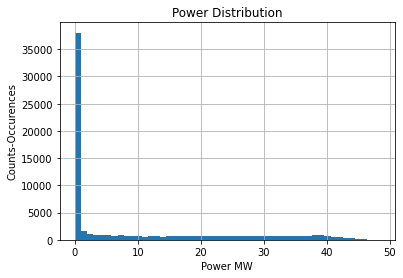

In [71]:
dataset['Power (MW)'].hist(bins=50)
plt.title('Power Distribution')
plt.xlabel('Power MW')
plt.ylabel('Counts-Occurences')
plt.show()

                                       count        mean         std    min  \
Total solar irradiance (W/m2)        70175.0  266.211129  367.893799    0.0   
Direct normal irradiance (W/m2)      70175.0   93.258326  200.778335    0.0   
Global horizontal irradiance (W/m2)  70175.0   67.693595  111.198478    0.0   
Air temperature  (°C)                70175.0   13.148522   14.336642  -18.2   
Atmosphere (hpa)                     70175.0  913.366904    8.740467  894.0   
Power (MW)                           70175.0    9.669499   13.705151    0.0   

                                       25%    50%         75%         max  
Total solar irradiance (W/m2)          0.0    5.0  540.000000  1359.00000  
Direct normal irradiance (W/m2)        0.0    1.0   36.000000   980.00000  
Global horizontal irradiance (W/m2)    0.0    4.0   97.000000   989.00000  
Air temperature  (°C)                  0.0   15.1   25.300000    41.20000  
Atmosphere (hpa)                     905.7  913.3  920.200000   93

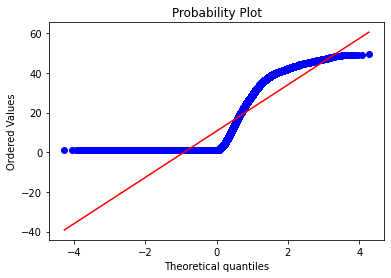

In [72]:
stats.probplot((dataset['Power (MW)'] + 1) , plot=plt)
print(dataset.describe().T)
plt.show()

In [73]:
def createXY(dataset, n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i, -1])
    return np.array(dataX), np.array(dataY)

In [74]:
log_of_power = np.log(dataset['Power (MW)'])
print(log_of_power)



Time(year-month-day h:m:s)
2019-01-01 00:15:00   -inf
2019-01-01 00:30:00   -inf
2019-01-01 00:45:00   -inf
2019-01-01 01:00:00   -inf
2019-01-01 01:15:00   -inf
                      ... 
2020-12-31 22:45:00   -inf
2020-12-31 23:00:00   -inf
2020-12-31 23:15:00   -inf
2020-12-31 23:30:00   -inf
2020-12-31 23:45:00   -inf
Name: Power (MW), Length: 70175, dtype: float64


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [75]:
trainX, trainY = createXY(df_for_training_scaled, 30)
print(trainX.shape, trainY.shape)
testX, testY = createXY(df_for_testing_scaled, 30)
print(testX.shape, testY.shape)

(63127, 30, 6) (63127,)
(6988, 30, 6) (6988,)


In [77]:
from keras.layers import Conv1D
from keras.layers import Dropout
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(Conv1D(64, 2, activation='relu', padding='causal', input_shape=(None, 6)))
    grid_model.add(LSTM(50, return_sequences=True, input_shape=(30, 6)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss='mse', optimizer=optimizer)
    return grid_model

In [78]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.layers import *
grid_model = KerasRegressor(build_fn=build_model, verbose=1, validation_data=(testX, testY))
parameters = {'batch_size': [16, 32],
              'epochs': [10, 20],
              'optimizer': ['adam', 'Adadelta', 'SGD']}
grid_search = GridSearchCV(estimator=grid_model,
                           param_grid=parameters,
                           cv=2)
grid_search = grid_search.fit(trainX, trainY)
print(grid_search.best_params_)

<ipython-input-78-768cbc18562a>:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasRegressor(build_fn=build_model, verbose=1, validation_data=(testX, testY))


Epoch 1/10
1973/1973 [==============================] - 27s 8ms/step - loss: 0.0044 - val_loss: 0.0022
Epoch 2/10
1973/1973 [==============================] - 15s 8ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 3/10
1973/1973 [==============================] - 16s 8ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 4/10
1973/1973 [==============================] - 17s 9ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 5/10
1973/1973 [==============================] - 15s 8ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 6/10
1973/1973 [==============================] - 16s 8ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 7/10
1973/1973 [==============================] - 16s 8ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 8/10
1973/1973 [==============================] - 15s 8ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 9/10
1973/1973 [==============================] - 15s 8ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 10/10
1973/1973 [==============================] - 8s 4ms/step - lo

In [79]:
print(grid_search.best_params_)
my_model = grid_search.best_estimator_.model

{'batch_size': 32, 'epochs': 10, 'optimizer': 'adam'}


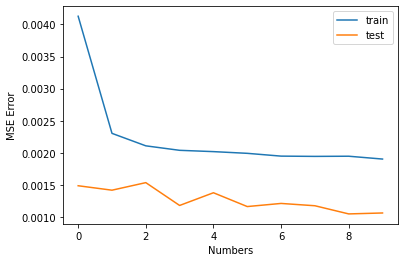

In [89]:
# {'batch_size': 32, 'epochs': 10, 'optimizer': 'adam'}
pyplot.plot(my_model.history.history['loss'], label='train')
pyplot.plot(my_model.history.history['val_loss'], label='test')
plt.xlabel('Numbers')
plt.ylabel('MSE Error')
pyplot.legend()
pyplot.show()
# my_model.history.history['loss']

219/219 [==============================] - 1s 3ms/step
prediction
 [[-0.00079271]
 [-0.00060248]
 [-0.00071867]
 ...
 [-0.00097346]
 [-0.00181189]
 [-0.00248449]]

Prediction Shape- (6988, 1)
(6988,)
(41928,)
(6988,)


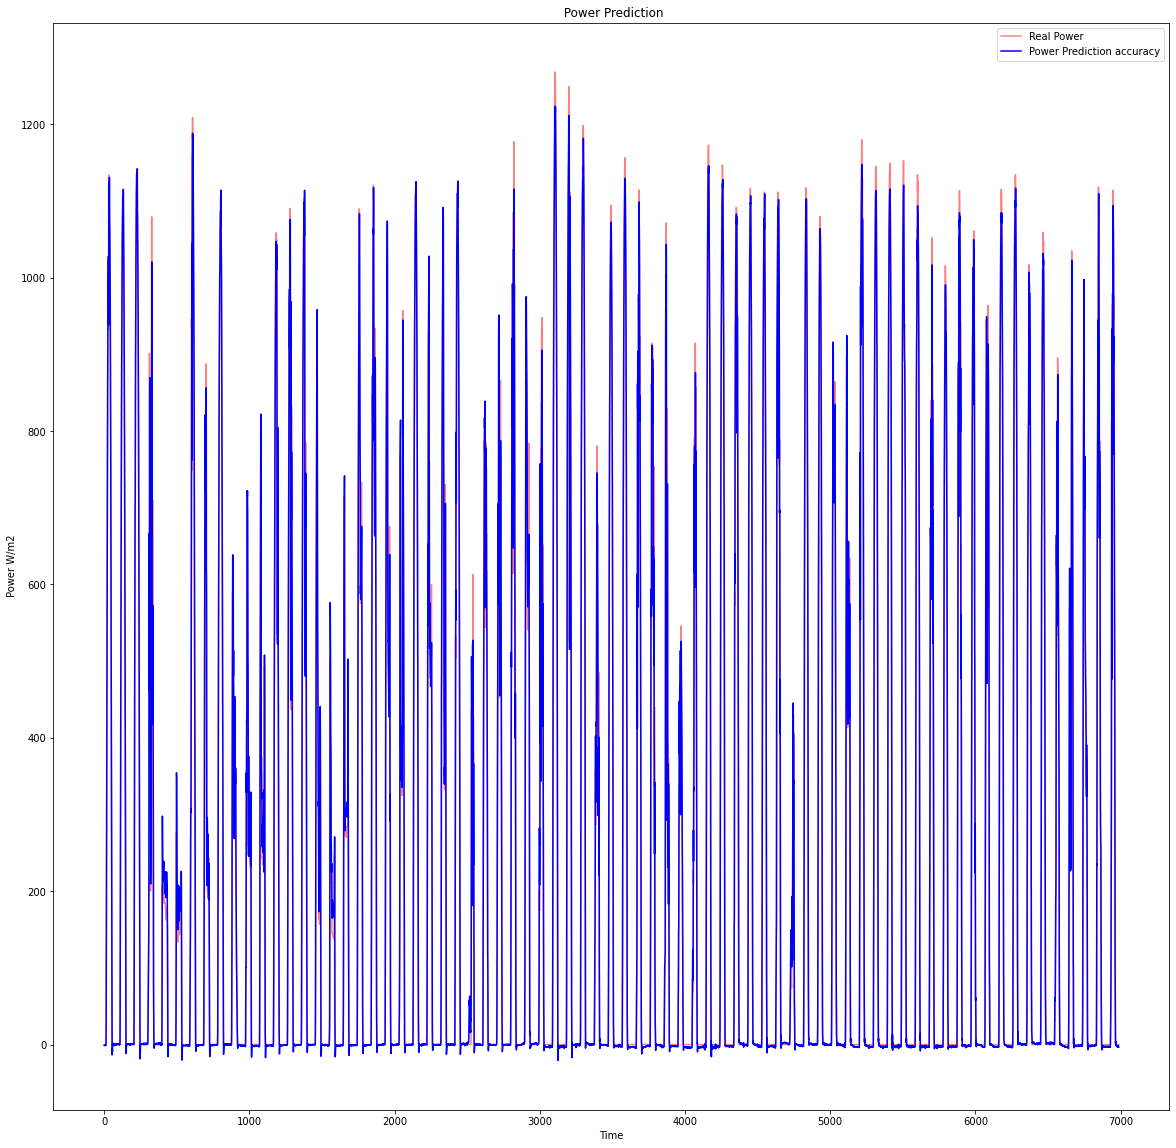

In [92]:
prediction = my_model.predict(testX)
print("prediction\n", prediction)
print("\nPrediction Shape-", prediction.shape)
prediction_copies_array = np.repeat(prediction, 6, axis=-1)
pred = scaler.inverse_transform(np.reshape(prediction_copies_array, (len(prediction), 6)))[:, 0]
print(pred.shape)
original_copies_array = np.repeat(testY, 6, axis=-1)
print(original_copies_array.shape)
original = scaler.inverse_transform(np.reshape(original_copies_array, (len(testY), 6)))[:, 0]
print(original.shape)
plt.figure(figsize=(20,20))
plt.plot(original, color='red', label='Real Power', alpha=0.5)
plt.plot(pred, color='blue', label='Power Prediction accuracy')
plt.title(' Power Prediction')
plt.xlabel('Time')
plt.ylabel(' Power W/m2')
plt.legend()
plt.show()

In [93]:
rmse = sqrt(mean_squared_error(original, pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 44.286


In [95]:
from sklearn.metrics import r2_score
testScore = math.sqrt(r2_score(original, pred))
print('Test Score: %.2f R2' % (testScore))

Test Score: 0.99 R2


In [96]:
my_model.save('Power_value_site1.h5')
print('Model Saved!')

Model Saved!
